# Homework 8: Central Limit Theorem

**Reading**: Textbook chapter [14](https://umass-data-science.github.io/190fwebsite/textbook/14/why-the-mean-matters/).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 8 is due **Monday, 11/19 at 11:59pm**. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](https://umass-data-science.github.io/190fwebsite/policy/) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [ ]:
# Don't change this cell; just run it. 
! pip install -U okpy

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw08.ok')
_ = ok.auth(inline=True)

Requirement already up-to-date: okpy in /usr/local/anaconda3/lib/python3.6/site-packages (1.13.11)
Requirement not upgraded as not directly required: requests==2.12.4 in /usr/local/anaconda3/lib/python3.6/site-packages (from okpy) (2.12.4)
Requirement not upgraded as not directly required: coverage==3.7.1 in /usr/local/anaconda3/lib/python3.6/site-packages (from okpy) (3.7.1)
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Assignment: Homework 8: Confidence Intervals
OK, version v1.13.11



ERROR  | auth.py:91 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.



## 1. The Bootstrap and The Normal Curve


In this exercise, we will explore a dataset that includes the safety inspection scores for restauraunts in the city of Austin, Texas.  We will be interested in determining the average restaurant score (out of 100) for the city from a random sample of the scores.  We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [ ]:
# Just run this cell.
pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop(5,6)
pop_restaurants

#### Question 1 (Ungraded)
Plot a histogram of the scores.

In [ ]:
# Write your code here.
...

This is the population mean:

In [ ]:
pop_mean = np.mean(pop_restaurants.column(3))
pop_mean

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 restaurant inspections, called `restaurant_sample`.  That table is created below. We are interested in using this sample to estimate the population mean.

In [ ]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

#### Question 2 (Ungraded)
Plot a histogram of the **sample** scores. 

In [6]:
# Write your code here:
...

This is the **sample mean**:

In [7]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_mean

92.68

#### Question 3
Complete the function `bootstrap_scores` below. It should take no arguments. It should simulate drawing 5000 resamples from `restaurant_sample` and computing the mean restaurant score in each resample.  It should return an array of those 5000 resample means.

In [8]:
def bootstrap_scores():
    resampled_means = ...
    for i in range(5000):
        resampled_mean = ...
        resampled_means = ...
    ...

resampled_means = bootstrap_scores()
resampled_means

In [9]:
_ = ok.grade('q1_3')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 1_3 > Suite 1 > Case 1

>>> type(resampled_means) == type(make_array())
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q1_3 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw09.ipynb'.
Backup... 0.0% complete
Could not backup: Assignment does not exist



Take a look at the histogram of the **resampled means**.

TypeError: '<' not supported between instances of 'NoneType' and 'float'

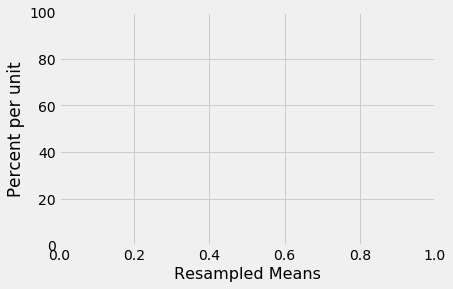

In [10]:
Table().with_column('Resampled Means', resampled_means).hist()

#### Question 4
Compute a 95 percent confidence interval for the average restaurant score using the array `resampled_means`.

In [11]:
lower_bound = ...
upper_bound = ...
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( Ellipsis , Ellipsis )


#### Question 5
Does the distribution of the resampled mean scores look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

*Write your answer here, replacing this text.*

#### Question 6
Does the distribution of the **sample scores** (notice we're no longer talking about the resampled means) look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

*Write your answer here, replacing this text.*

For the last question, you'll need to recall two facts.
1. If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.
2. The Central Limit Theorem tells us the quantitative relationship between
    * the standard deviation of an array of numbers and
    * the standard deviation of an array of means of samples taken from those numbers.

#### Question 7
Without referencing the array `resampled_means` or performing any new simulations, calculate an interval around the `sample_mean` that covers approximately 95% of the numbers in the `resampled_means` array.  **You may use the following values to compute your result, but you should not perform additional resampling** - think about how you can use the CLT to accomplish this.

In [12]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_sd = np.std(restaurant_sample.column(3))
sample_size = restaurant_sample.num_rows

lower_bound_normal = ...
upper_bound_normal = ...
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( Ellipsis , Ellipsis )


This confidence interval should look very similar to the one you computed in Question 4. If not, try calculating the inner 95 percent using 1.96 standard deviations instead of 2 for a more precise calculation. If they are still very different, there may be an error in your code.

## 2. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the **sum** or **average** of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by 

$$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ 

In other words, suppose we start with *any distribution* that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the **mean** of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

<div class="hide">\pagebreak</div>
**Question 1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which is definitely not a normal distribution.  The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [13]:
def sample_size_n(n):
    coin_proportions = make_array(.5, .5) # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        simulated_proportions = ...
        prop_heads = ...
        heads_proportions = ...
    return heads_proportions


sample_size_n(5)

Ellipsis

<div class="hide">\pagebreak</div>
The code below will use the function you just defined to plot the empirical distribution of the sample mean for various sample sizes. Drag the slider or click on the number to the right to type in a sample size of your choice. The x- and y-scales are kept the same to facilitate comparisons. Notice the shape of the graph as the sample size increases and decreases.

interactive(children=(IntSlider(value=200, description='x', max=400), Output()), _dom_classes=('widget-interact',))

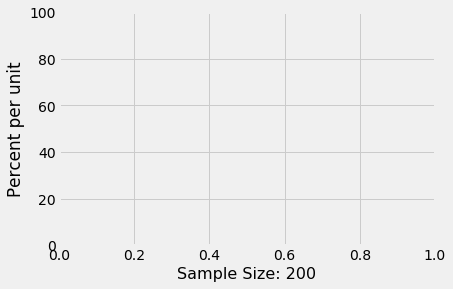

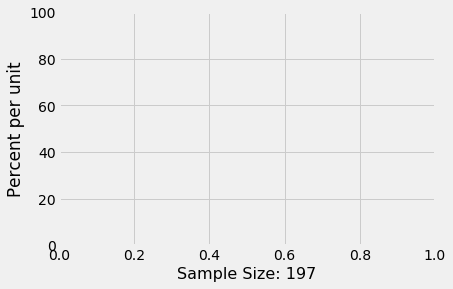

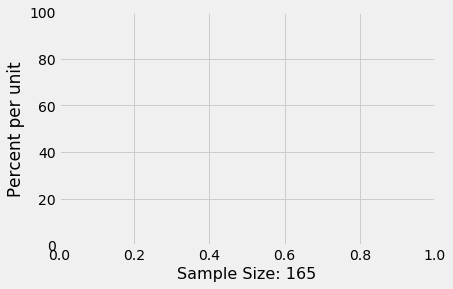

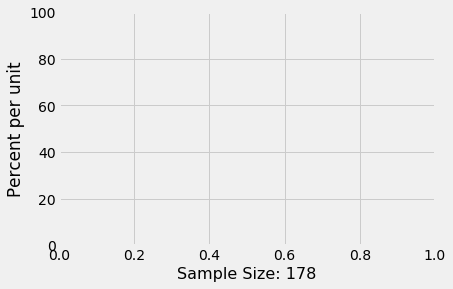

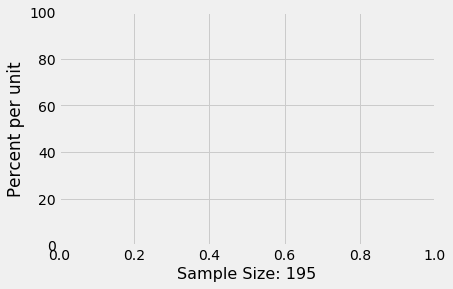

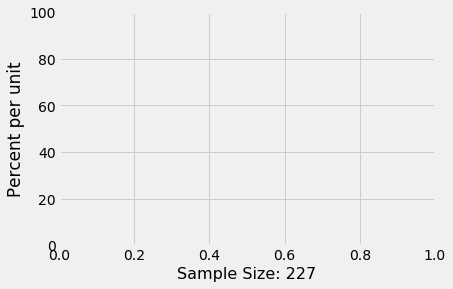

In [14]:
# Just run this cell
from ipywidgets import interact

def outer(f):
    def graph(x):
        bins = np.arange(-0.01,1.05,0.02)
        sample_props = f(x)
        Table().with_column('Sample Size: {}'.format(x), sample_props).hist(bins=bins)
        plt.ylim(0, 30)
        print('Sample SD:', np.std(sample_props))
        plt.show()
    return graph
    
interact(outer(sample_size_n), x=(0, 400, 1), continuous_update=False);

# Min sample size is 0, max is 400
# The graph will refresh a few times when you drag the slider around

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

<div class="hide">\pagebreak</div>
**Question 2:** In the plot for a sample size of 10, why are the bars spaced at intervals of .1, with gaps in between?

*Write your answer here, replacing this text.*

<div class="hide">\pagebreak</div>
Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported the flight delay data and computed its standard deviation for you.

In [15]:
united = Table.read_table('united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.48019985160931

<div class="hide">\pagebreak</div>
**Question 3:** Write a function called `empirical_sample_mean_sd` that takes a sample size `n` as its argument. The function should simulate 500 samples with replacemnt of size `n` from the flight delays dataset, and it should return the standard deviation of the **means of those 500 samples**.

*Hint:* This function will be similar to the `sample_size_n` function you wrote earlier.

In [16]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = ...
        sample_mean = ...
        sample_means = ...
    return np.std(sample_means)

empirical_sample_mean_sd(10)

AttributeError: 'ellipsis' object has no attribute 'dtype'

In [17]:
_ = ok.grade('q2_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 2_3 > Suite 1 > Case 1

>>> 30 <= empirical_sample_mean_sd(1) <= 50
Traceback (most recent call last):
  File "<ipython-input-16-799a2189b08d>", line 7, in empirical_sample_mean_sd
    return np.std(sample_means)
  File "/home/mjasim/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py", line 3075, in std
    **kwargs)
  File "/home/mjasim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py", line 135, in _std
    keepdims=keepdims)
  File "/home/mjasim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py", line 107, in _var
    arrmean = arrmean.dtype.type(arrmean / rcount)
AttributeError: 'ellipsis' object has no attribute 'dtype'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     AttributeError: 'ellipsis' object has no attribute 'dtype'

Run only

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw09.ipynb'.
Backup... 0.0% complete
Could not backup: Assignment does not exist



**Question 4:** Now, write a function called `predict_sample_mean_sd` to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed [here](https://umass-data-science.github.io/190fwebsite/textbook/14/5/variability-of-the-sample-mean/) in the textbook. It takes a sample size `n` (a number) as its argument.  It returns the predicted value of the standard deviation of the mean delay time for samples of size `n` from the flight delays (represented in the table `united`).

In [36]:
def predict_sample_mean_sd(n):
    ...

predict_sample_mean_sd(10)

In [37]:
_ = ok.grade('q2_4')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 2_4 > Suite 1 > Case 1

>>> np.isclose(predict_sample_mean_sd(1), 39.480199851609314)
Traceback (most recent call last):
  File "/home/mjasim/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py", line 2332, in isclose
    xfin = isfinite(x)
TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Run only this test case with "python3 ok -q q2_4 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw09.ipynb'.
Backup... 0.0% complete
Could not backup: Assignment does not exist



<div class="hide">\pagebreak</div>
The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes.

In [38]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sample_mean_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sample_mean_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')

AttributeError: 'ellipsis' object has no attribute 'dtype'

<div class="hide">\pagebreak</div>
**Question 5:** Do our predicted and empirical values match? Why is this the case?

*Write your answer here, replacing this text.*

## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw09.ipynb'.
Submit... 0.0% complete
Could not submit: Assignment does not exist
